# Напряжение на SIPM в 2018_12_07-08_run2

Время взято из данных GPS - мировое время UTC.

In [1]:
!date
!pwd

Чт дек 20 15:53:29 MSK 2018
/home/sphere/ExpData/2018/Data/2018_12_07-08_run2/high


In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import dates
import datetime as dt

In [32]:
plt.rcParams['figure.figsize'] =(8,4)
plt.rcParams['lines.markersize'] = 3
plt.rcParams['lines.markeredgewidth'] = 1
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['grid.alpha'] = 0.7
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['font.size'] = 12

# чтение данных 

In [149]:
# чтение данных из дебаг. файлов
data = pd.read_csv('high.txt', index_col=False, sep='\s+')
data['strTime'] =  data['GPS'].astype('str')
print(len(data))

data.head()

7963


,EID,GPS,kod1,kod2,kod3,kod4,high,cur,temp,strTime
0,20546,17:47:29,739,3627,3738,1088,-25.41,0.556,4.4,17:47:29
1,20547,17:47:29,739,3627,3738,1088,-25.41,0.556,4.4,17:47:29
2,20548,17:47:29,739,3627,3738,1088,-25.41,0.556,4.4,17:47:29
3,20549,17:47:29,739,3627,3738,1088,-25.41,0.556,4.4,17:47:29
4,20550,17:47:29,739,3627,3738,1088,-25.41,0.556,4.4,17:47:29


In [150]:
## for SiPM mosaic
#def f(t):
#    return(0.01514 * t - 36.60)

#data['Uhigh'] = data.kod1 * 0.01514 - 36.60 - 1.9
data['Uhigh'] = data.high - 1.9

In [151]:
data.describe()

,EID,kod1,kod2,kod3,kod4,high,cur,temp,Uhigh
count,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000
mean,24527.210976,625.077232,3458.682155,3735.300138,1042.007535,-26.907006,1.297387,2.122027,-28.807006
std,2299.242407,37.581451,46.728336,2.602838,27.081908,1.062618,0.332062,1.395260,1.062618
min,20546.000000,611.000000,3403.000000,3730.000000,1009.000000,-27.330000,0.125000,0.400000,-29.230000
25%,22536.500000,618.000000,3425.000000,3733.000000,1023.000000,-27.240000,1.288000,1.100000,-29.140000
50%,24527.000000,618.000000,3453.000000,3735.000000,1026.000000,-27.240000,1.363000,1.200000,-29.140000
75%,26517.500000,618.000000,3470.000000,3737.000000,1077.000000,-27.230000,1.539000,4.000000,-29.130000
max,28788.000000,1369.000000,3711.000000,3740.000000,1088.000000,-15.870000,1.654000,4.400000,-17.770000


In [152]:
# чтение данных токов из событий
head=['EID','H','UTC']+['cur'+str(x) for x in range(112)]
curr = pd.read_csv('currents.txt', index_col=False, header=None, names=head, sep='\s+')
print(len(curr))
curr[:3]

5950


,EID,H,UTC,cur0,cur1,cur2,cur3,cur4,cur5,cur6,...,cur102,cur103,cur104,cur105,cur106,cur107,cur108,cur109,cur110,cur111
0,21510,145.2,18:01:05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,21511,145.2,18:01:05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,21512,145.1,18:01:25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
curr.cur52.describe()

count    5950.000000
mean      117.782403
std        14.018166
min         0.000000
25%       119.100000
50%       119.400000
75%       119.600000
max       122.100000
Name: cur52, dtype: float64

In [153]:
''' Соединим два списка, чтобы оставить только 
данные для существующих событий '''
new = pd.merge(data,curr,how='inner', on='EID')
new.shape

(5670, 125)

## Draw

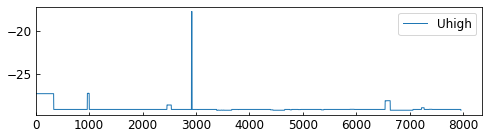

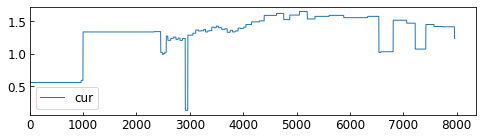

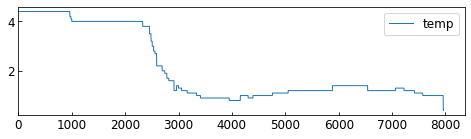

In [71]:
for x in ['Uhigh','cur','temp']:
    plt.figure(figsize=(8,2))
    plt.plot(data[x],   label = x)
    plt.xlim(0)
    plt.legend()

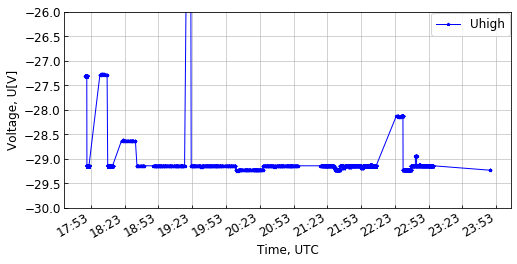

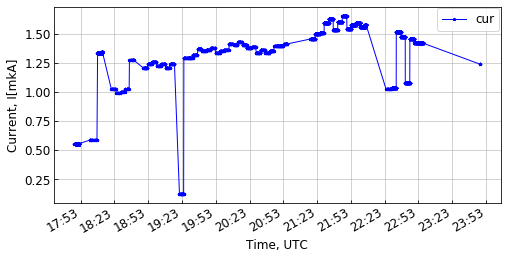

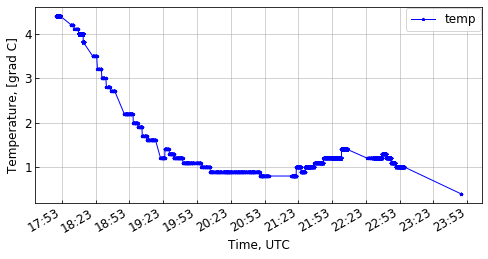

In [76]:
ylabel = ['Voltage, U[V]', 'Current, I[mkA]', 'Temperature, [grad C]']
i=0
for y in ['Uhigh','cur','temp']:
    #plt.figure()
    fig, ax = plt.subplots(figsize=(8,4))
    x = [dt.datetime.strptime(i, '%H:%M:%S') for i in data['strTime']]
    plt.plot(x, data[y], '*-b', label = y)
    if y == 'Uhigh':
        plt.ylim(-30,-26)
    plt.xlabel('Time, UTC')
    plt.ylabel(ylabel[i])
    i += 1
    ax.xaxis.set_major_formatter(dates.DateFormatter('%H:%M'))
    ax.xaxis.set_major_locator(dates.MinuteLocator(interval=30))  # <--- NOTE!
    fig.autofmt_xdate()
    plt.legend(borderaxespad=0.1)
    plt.grid();

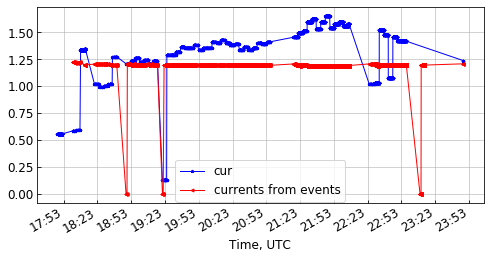

In [49]:
## draw currents
for y in ['cur']:
    #plt.figure()
    fig, ax = plt.subplots(figsize=(8,4))
    
    x = [dt.datetime.strptime(i, '%H:%M:%S') for i in data['strTime']]
    plt.plot(x, data[y], '*-b', label = y)
    
    x1 = [dt.datetime.strptime(i, '%H:%M:%S') for i in curr['UTC']]
    y1 = curr.cur52 * 0.01
    plt.plot(x1, y1, '<-r', label = 'currents from events')
    
    plt.xlabel('Time, UTC')
    ax.xaxis.set_major_formatter(dates.DateFormatter('%H:%M'))
    ax.xaxis.set_major_locator(dates.MinuteLocator(interval=30))  # <--- NOTE!
    fig.autofmt_xdate()
    plt.legend(borderaxespad=0.1)
    plt.grid();

#### В события писался какой-то неверный ток! 
Нужно проверить запись и попробовать восстановить правильный. Или брать его из файла дебага.

## Учет температуры

Температура изменялась в пределах от 0.4 до 4.4 градусов. Считаем ее практически постоянной. При необходимости, оценим влияние 4 градусов позднее.

In [129]:
data.temp.describe()

count    7963.000000
mean        2.122027
std         1.395260
min         0.400000
25%         1.100000
50%         1.200000
75%         4.000000
max         4.400000
Name: temp, dtype: float64

In [14]:
## тепловой шум для напряжения V = 29.2B, DAC = 255
def f255(x):
    return 0.456 * np.exp(0.079*(x))

## тепловой шум для напряжения V = 28.8B, DAC = 250
def f250(x):
    return f255(x) * 0.868   #0.85436  ## 35.2/41.2 = 0.8543689

print(f250(4.4)/f250(0))

1.41566587012


## Приведение к одному напряжению

Приводим к напряжению -29.14 как к наиболее частому.

In [154]:
data.Uhigh.describe()

count    7963.000000
mean      -28.807006
std         1.062618
min       -29.230000
25%       -29.140000
50%       -29.140000
75%       -29.130000
max       -17.770000
Name: Uhigh, dtype: float64

Подбор  зависимости тока от напряжения проведен в 
/home/sphere/ExpData/2018/Data/2018_12_07-08_run2/high/I(U)\_approximation

В диапазоне от -27.0 до -29.5 В можно использовать линейное приближение:

I(U) = -13.23 * U - 345


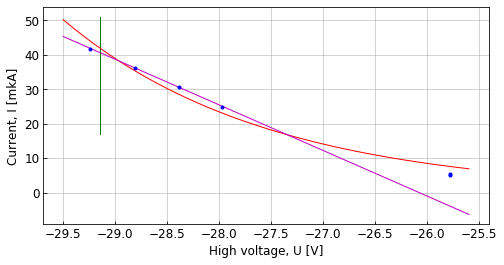

In [131]:
# linear fit for voltage
def flin(x):
    return -13.23 * x - 345

# exponenta fit for voltage
def f(x):
    #return 0.0159 * np.exp(-0.502*(x + 13.4)**1)
    return 0.01534 * np.exp(-0.508*(x + 13.57)**1)

x = [-29.143, -29.143]
y = [17, 51]
plt.plot(x,y,'g-')

t1 = np.arange(-29.5,-25.5,0.1)
plt.plot(t1, f(t1),    'r-')
plt.plot(t1, flin(t1), 'm-')

plt.plot(high.U, high.I,'bo')

plt.xlabel('High voltage, U [V]')
plt.ylabel('Current, I [mkA]')
plt.grid()

In [132]:
''' Пересчет к напряжению -29.143'''
U = -30.0
I = flin(-29.14)/flin(U)
I 

0.7815393063583811

In [166]:
new['I_coef'] = flin(-29.14)/flin(new['Uhigh'])
new['cur_n'] = new.cur * new['I_coef']
new = new[new.Uhigh < -25.0]
new.shape

(5622, 127)

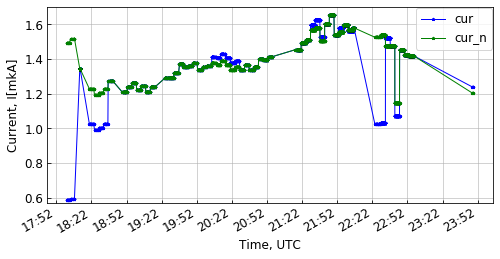

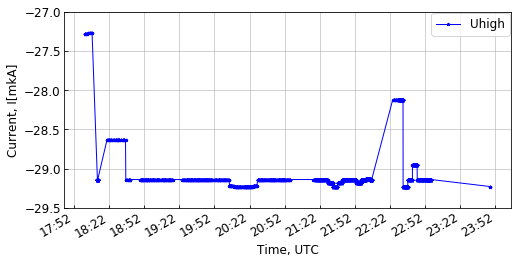

In [167]:
for y in ['cur', 'Uhigh']:
    fig, ax = plt.subplots(figsize=(8,4))
    x = [dt.datetime.strptime(i, '%H:%M:%S') for i in new['strTime']]
    plt.plot(x, new[y], '*-b', label = y)
    if y == 'cur':
        plt.plot(x, new.cur_n, '*-g', label = 'cur_n')    
    if y == 'Uhigh':
        plt.ylim(-29.5,-27)
    else:
        plt.ylim(0.57,1.7)

    plt.xlabel('Time, UTC')
    plt.ylabel('Current, I[mkA]')
    ax.xaxis.set_major_formatter(dates.DateFormatter('%H:%M'))
    ax.xaxis.set_major_locator(dates.MinuteLocator(interval=30))  # <--- NOTE!
    fig.autofmt_xdate()
    plt.legend(borderaxespad=0.1)
    plt.grid();